In [76]:

# Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.  Decision trees are usually used when doing gradient boosting.  Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets.

# Classification refers to the task of giving a machine learning algorithm features, and having the algorithm put the instances/data points into one of many discrete classes.  Classes are categorical in nature, it isn't possible for an instance to be classified as partially one class and partially another.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


train_data = pd.read_csv("C:\\train.csv")
test_data = pd.read_csv("C:\\test.csv")

train_data = train_data.fillna(0)
test_data = test_data.fillna(0)


y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)


full_data = train_data.append(test_data)


drop_columns = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
full_data.drop(labels=drop_columns, axis=1, inplace=True)


full_data = pd.get_dummies(full_data, columns=["Sex"])
full_data.fillna(value=0.0, inplace=True)


X_train = full_data.values[0:891]
X_test = full_data.values[891:]


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)


lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
    

Learning rate:  0.05
Accuracy score (training): 0.801
Accuracy score (validation): 0.731
Learning rate:  0.075
Accuracy score (training): 0.814
Accuracy score (validation): 0.731
Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.724
Learning rate:  0.25
Accuracy score (training): 0.835
Accuracy score (validation): 0.750
Learning rate:  0.5
Accuracy score (training): 0.864
Accuracy score (validation): 0.772
Learning rate:  0.75
Accuracy score (training): 0.875
Accuracy score (validation): 0.754
Learning rate:  1
Accuracy score (training): 0.875
Accuracy score (validation): 0.739


In [77]:


gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))


Confusion Matrix:
[[142  19]
 [ 42  65]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       161
           1       0.77      0.61      0.68       107

    accuracy                           0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



In [78]:

# XGBoost Classifier
from xgboost import XGBClassifier


xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)


score = xgb_clf.score(X_val, y_val)
print(score)


0.746268656716418


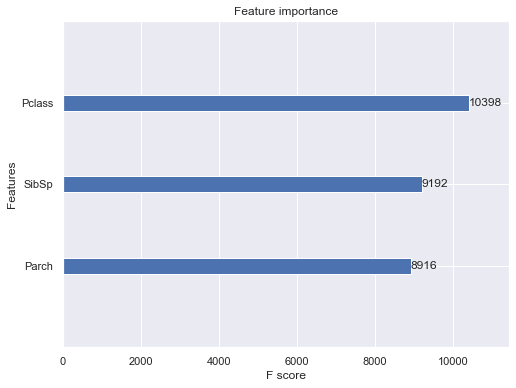

In [80]:

# Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.  There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.  Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

# Feature Importance Experiment

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

train = train_data[['Pclass',
                    'SibSp',
                    'Parch',
                    'Fare',
                    'Age']]


# split data into X and y
X = train.iloc[:,0:3]
y = train.iloc[:,4]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()



In [ ]:


# data:
# https://www.kaggle.com/c/titanic/data

